# 特徵萃取其二

    在最後端增加Dense layers來擴展model(conv_base)，並輸入資料，從頭開始整個處理過程。
    可以進行資料擴增，但是技術成本較高

In [1]:
import tensorflow as tf
from tensorflow import keras

tf.__version__

'2.1.0'

In [2]:
from tensorflow.keras.applications import VGG16
conv_base=VGG16(weights='imagenet',
               include_top=False, #不包含密集連接分類器
               input_shape=(150, 150, 3))

In [5]:
model = keras.Sequential()
model.add(conv_base)
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(256,activation='relu'))
model.add(keras.layers.Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               2097408   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


# 凍結捲積基底
    凍結(freeze)表示訓練期間禁止更新權重

In [6]:
print('This is the number of trainable weights '
'before freezing the conv base:', len(model.trainable_weights))

conv_base.trainable = False  

print('This is the number of trainable weights '
'after freezing the conv base:', len(model.trainable_weights))


This is the number of trainable weights before freezing the conv base: 30
This is the number of trainable weights after freezing the conv base: 4


In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
import os
import numpy as np

base_dir = r'D:\Final\code\LAB\keras\dogs-vs-cats\cats_and_dogs_small' 
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

train_datagen = ImageDataGenerator( # 擴充訓練資料
	rescale=1./255,
	rotation_range=40,
	width_shift_range=0.2,
	height_shift_range=0.2,
	shear_range=0.2,
	zoom_range=0.2,
	horizontal_flip=True,
	fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255) # 請注意驗證資料不應該擴充


train_generator = train_datagen.flow_from_directory(
	train_dir, # 目標目錄路徑
	target_size=(150, 150), # 調整所有圖像大小成 150×150 
	batch_size=20,
	class_mode='binary') # 因為使用二元交叉熵 binary_crossentropy 作為損失分數，所						以需要二元標籤

validation_generator = test_datagen.flow_from_directory(
	validation_dir,
	target_size=(150, 150),
	batch_size=20,
	class_mode='binary')

model.compile( loss='binary_crossentropy',
			 optimizer=optimizers.RMSprop(lr=2e-5),
			 metrics=['acc'])

history = model.fit_generator(
	train_generator,
	steps_per_epoch=100,
	epochs=30,
	validation_data=validation_generator,
	validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 100 steps, validate for 50 steps
Epoch 1/30
100/100 [==============================] - 56s 558ms/step - loss: 0.5896 - acc: 0.6820 - val_loss: 0.4430 - val_acc: 0.8350
Epoch 2/30
100/100 [==============================] - 33s 326ms/step - loss: 0.4866 - acc: 0.7845 - val_loss: 0.3615 - val_acc: 0.8730
Epoch 3/30
100/100 [==============================] - 32s 324ms/step - loss: 0.4297 - acc: 0.8155 - val_loss: 0.3269 - val_acc: 0.8820
Epoch 4/30
100/100 [==============================] - 32s 325ms/step - loss: 0.4091 - acc: 0.8220 - val_loss: 0.3066 - val_acc: 0.8700
Epoch 5/30
100/100 [==============================] - 32s 324ms/step - loss: 0.3869 - acc: 0.8175 - val_loss: 0.2868 - val_acc: 0.8890
Epoch 6/30
100/100 [==============================] - 32s 324ms/step - l

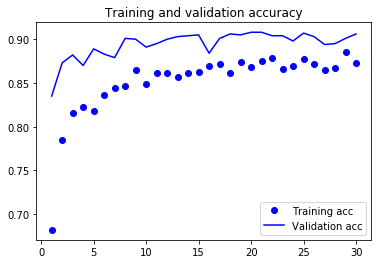

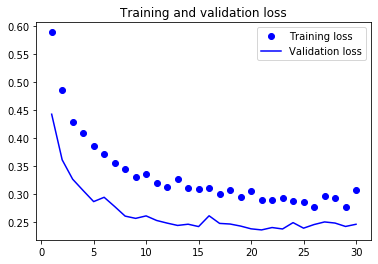

In [9]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()